In [1]:
# curvefit with non linear least squares (curve_fit function)
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

In [11]:
def func_lin(x, a, b, c):
    return a * x[0] + b * x[1] + c

def func_nlin(x, a, b, c, n1, n2):
    return n1 * np.square(x[0]) + n2 * np.square(x[1]) + a * x[0] + b * x[1] + c

In [27]:
x = np.arange(-10, 10, 0.1)
y = np.arange(-10, 10, 0.1)
X, Y = np.meshgrid(x, y)
x_data = np.vstack((X.reshape((1, X.size)), Y.reshape((1, Y.size))))

original = (3, 2, 1)
original_nlin = original + (0.5, 0.5)
Z = func_lin(x_data, *original)
Z_nlin = func_nlin(x_data, *original_nlin)
Z_noise = Z + 10 * np.random.randn(*Z.shape)
y_data = Z_noise.reshape(Z_noise.size)
y_data_nlin = Z_nlin.reshape(Z_noise.size)


# Curve fit
popt, pcov = curve_fit(func_lin, x_data, y_data)
print("original: {}\nfitted: {}".format(original, popt))
z_fit = func_lin(x_data, *popt)
Z_fit = z_fit.reshape(*X.shape)

popt_nlin, pcov_nlin = curve_fit(func_lin, x_data, y_data_nlin)
print("original: {}\nfitted: {}".format(original, popt_nlin))
z_fit_nlin = func_lin(x_data, *popt_nlin)
Z_fit_nlin = z_fit_nlin.reshape(*X.shape)

original: (3, 2, 1)
fitted: [2.99668403 2.00109906 1.09020903]
original: (3, 2, 1)
fitted: [ 2.95  1.95 34.33]


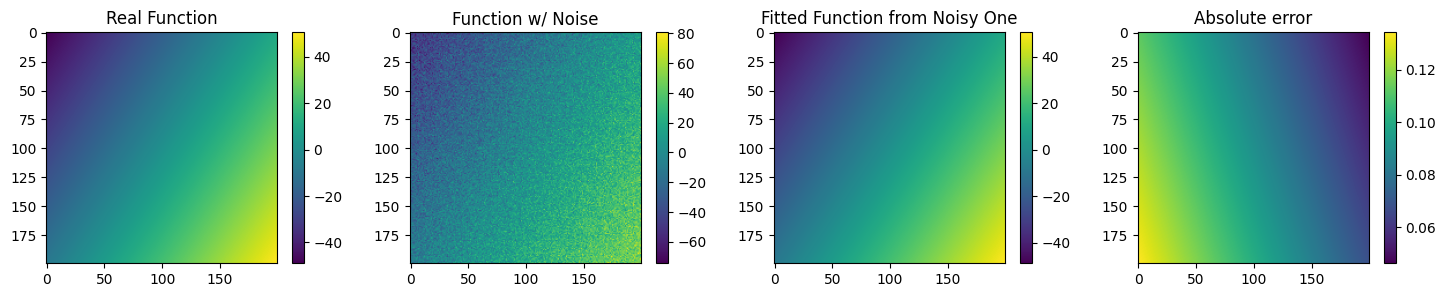

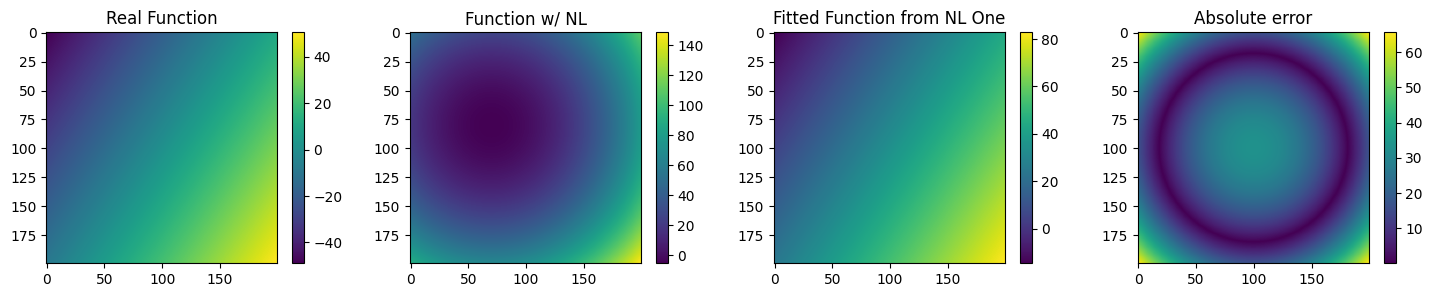

In [28]:
fig, axs = plt.subplots(1, 4, figsize=(18,3))
axs[0].set_title("Real Function")
pl0 = axs[0].imshow(Z.reshape(*X.shape))
plt.colorbar(pl0, ax=axs[0])

axs[1].set_title("Function w/ Noise")
pl1 = axs[1].imshow(Z_noise.reshape(*X.shape))
plt.colorbar(pl1, ax=axs[1])

axs[2].set_title("Fitted Function from Noisy One")
pl2 = axs[2].imshow(Z_fit)
plt.colorbar(pl2, ax=axs[2])

axs[3].set_title("Absolute error")
pl3 = axs[3].imshow(np.abs(Z_fit - Z.reshape(*X.shape)))
plt.colorbar(pl3, ax=axs[3])
plt.show()



fig, axs = plt.subplots(1, 4, figsize=(18,3))
axs[0].set_title("Real Function")
pl0 = axs[0].imshow(Z.reshape(*X.shape))
plt.colorbar(pl0, ax=axs[0])

axs[1].set_title("Function w/ NL")
pl1 = axs[1].imshow(Z_nlin.reshape(*X.shape))
plt.colorbar(pl1, ax=axs[1])

axs[2].set_title("Fitted Function from NL One")
pl2 = axs[2].imshow(Z_fit_nlin)
plt.colorbar(pl2, ax=axs[2])

axs[3].set_title("Absolute error")
pl3 = axs[3].imshow(np.abs(Z_fit_nlin - Z_nlin.reshape(*X.shape)))
plt.colorbar(pl3, ax=axs[3])
plt.show()
